In [1]:
import pandas as pd

eos = pd.read_excel('/home/kshipra/work/major/ml experiments/data/manually_combined.xlsx', sheet_name='all_stacked_eos')
sentinel = pd.read_excel('/home/kshipra/work/major/ml experiments/data/manually_combined.xlsx', sheet_name='all_stacked_sentinel')

len(eos), len(sentinel)

(747, 796)

In [2]:
eos

,Date,Latitude,Longitude,HH,HV,SM
0,2022-09-11,22.526048,72.765011,-7.38713,-15.09099,24.4
1,2022-09-11,22.525481,72.765028,-6.25740,-12.05392,41.0
2,2022-09-11,22.525423,72.765663,-8.44134,-16.46069,25.3
3,2022-09-11,22.525999,72.765663,-2.85467,-17.00499,53.7
4,2022-09-11,22.525563,72.765399,-6.88868,-12.32378,53.4
...,...,...,...,...,...,...
742,2023-02-28,22.523640,72.766727,-8.69274,-14.15688,26.8
743,2023-02-28,22.523657,72.766016,-6.48271,-15.56076,32.8
744,2023-02-28,22.524255,72.766024,-6.20660,-14.73141,34.8
745,2023-02-28,22.524229,72.766601,-9.43414,-20.52987,27.8


In [55]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(np.sqrt(np.abs(eos[['HH', 'HV']])), eos[['SM']], train_size=0.9)

In [7]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.transform(X_test)

In [56]:
from sklearn.linear_model import LassoLars
from sklearn.metrics import mean_absolute_error, mean_squared_error

lasso = LassoLars(alpha=0.80)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(mse)
print(mae)

1006.8496006266569
13.259908309639778


In [31]:
y_test.min()

SM    5.0
dtype: float64

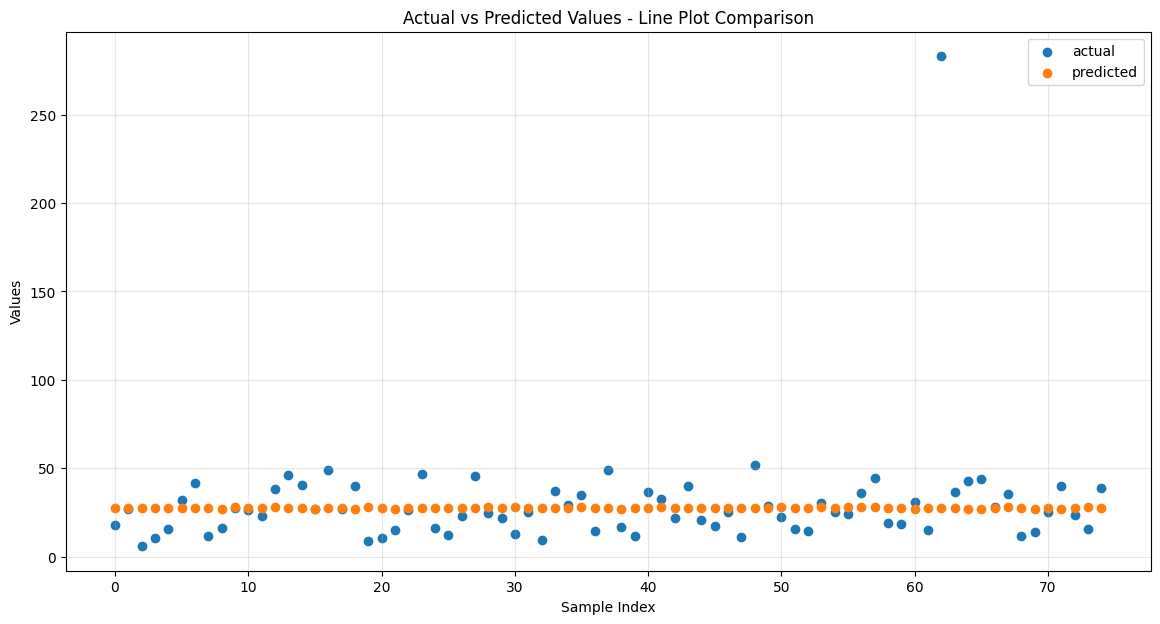

In [57]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 7))

# Create index for x-axis
indices = range(len(y_test))

# Plot both lines
plt.scatter(indices, y_test.values,label='actual')
plt.scatter(indices, y_pred, label='predicted')

plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values - Line Plot Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
from sklearn.linear_model import Lasso

l = Lasso()

l.fit(X_train_scaled, y_train)

l.score(X_test_scaled, y_test)

-0.0029937415112173404

In [10]:
from sklearn.linear_model import ElasticNet

el = ElasticNet()

el.fit(X_train_scaled, y_train)

el.score(X_test_scaled, y_test)

-0.0029937415112173404

<Axes: >

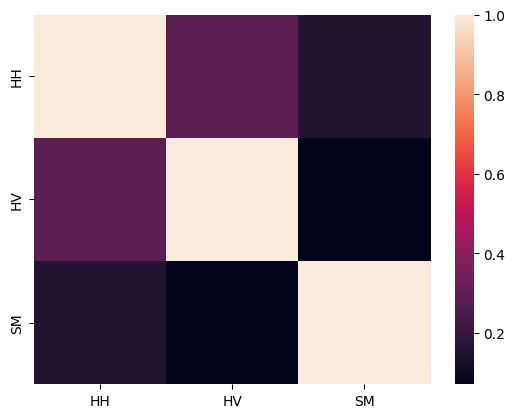

In [13]:
import seaborn as sns

sns.heatmap(eos[['HH', 'HV', 'SM']].corr())